# Entrenamiento 

## [English] Training

## [Portugues] Treinamento 

Este notebook esta dividido en dos partes principales: el prepocesamiento y el entrenamiento. En el primero se busca generar el dataset de entenamiento, y en el segundo se genera el modelo que luego se utiliza para predecir sobre un nuevo dataset de imagenes. 

[English] This notebook is divided into two main parts: preprocessing and training. In the first one we try to generate the training dataset, and in the second one we generate the model that is then used to predict on a new image dataset.  

[Portugues] Este caderno está dividido em duas partes principais: pré-processamento e treinamento. No primeiro, o objetivo é gerar o conjunto de dados de treinamento, e no segundo, o modelo é gerado e depois utilizado para prever em um novo conjunto de dados de imagem. 

## 1- Creación de dataset entrenamiento

En esta instacia generamos el dataset de imagenes y mascaras que utiliza el modelo para entrenar. 

[English] Training dataset creation   
In this installation we generate the dataset of images and masks used by the model for training. 

[Portugues] Criação do conjunto de dados de treinamento   
Nesta instalação, geramos o conjunto de dados de imagens e máscaras utilizadas pelo modelo para treinamento. 



**Librerias**

Importamos las librerias necesarias que utilizaremos para acceder a los archivos y ejecutar algunos comandos  

[English] **Libraries** 

We import the necessary libraries that we will use to access the files and execute some commands.

[Portugues] **Librerias**  

Importamos as bibliotecas necessárias que usaremos para acessar os arquivos e executar alguns comandos.

In [1]:
import glob
import os
from tqdm import tqdm

### Satproc

[Satproc](https://github.com/dymaxionlabs/satproc) es una herramienta que permite la generación del dataset entrenamiento (y predicción) con el formato necesario para los modelos de computer vision de segmentación de objetos. 

Entre las caracteristicas principales **Satproc** permite: 

* Crear el dataset de imágenes y máscaras, donde cada máscara delimita los objetos de interés para cada imagen. Este se crea a partir del archivo vectorial con los polígonos que delimitan los objetos de cada clase y la imagen original, que puede ser satelital, de drone u otras fuentes. 

* Permite re-escalar el rango de la imagen a 0-255 y aplicar cortes en los valores si fuera necesario. Por ejemplo, para Sentinel-2 se lleva del rango 0-0.3 (rango de valores de reflectancia típicos) a 0-255

* Permite definir el tamaño de la imagen del dataset. Esto es importante porque el objeto de interés no debe verse ni muy grande ni muy chico para cada imagen del dataset.

#### [English] Satproc

[Satproc](https://github.com/dymaxionlabs/satproc) is a tool that allows the generation of the training (and prediction) dataset with the necessary format for computer vision object segmentation models. 

Among the main features **Satproc** allows: 

* Create the dataset of images and masks, where each mask delimits the objects of interest for each image. This is created from the vector file with the polygons that delimit the objects of each class and the original image, which can be satellite, drone or other sources. 

* It allows rescaling the image range to 0-255 and applying cuts in the values if necessary. For example, for Sentinel-2 it is taken from the range 0-0.3 (range of typical reflectance values) to 0-255.

* Allows to define the size of the dataset image. This is important because the object of interest should not look too large or too small for each dataset image.

#### [Portugues] Satproc

[Satproc](https://github.com/dymaxionlabs/satproc) é uma ferramenta que permite a geração de conjuntos de dados de treinamento (e previsão) no formato necessário para modelos de segmentação de objetos de visão por computador. 

Entre as principais características **Satproc*** permite: 

* Criar o conjunto de dados de imagens e máscaras, onde cada máscara delimita os objetos de interesse para cada imagem. Isto é criado a partir do arquivo vetorial com os polígonos que delimitam os objetos de cada classe e a imagem original, que pode ser satélite, drone ou outras fontes. 

* Permite redimensionar a faixa de imagem para 0-255 e aplicar cortes de valor, se necessário. Por exemplo, para o Sentinel-2 é tomado da faixa de 0-0,3 (faixa de valores típicos de reflexão) a 0-255.

* Permite definir o tamanho da imagem do conjunto de dados. Isto é importante porque o objeto de interesse não deve parecer muito grande ou muito pequeno para cada imagem do conjunto de dados.

Este paquete de Python se instala con pip de la siguiente manera:  

[English] This Python package is installed with pip as follows:

[Portugues] Este pacote Python é instalado com pip como se segue:  

In [2]:
#!pip install pysatproc

#### Variables para configuracion de satproc  

[English] Variables for satproc configuration  

[Portugues] Variáveis para configuração satproc  

In [3]:
# tamaño de los chips
size = 600                # tamaño (en pixeles) de las imagenes que se van a generar
step_size = 100           # cantidad de pixeles que se desplaza cada chip
                          # (si es mas chico que `size`, los chips van a estar solapados)

# ruta al shapefile con los polígonos de anotaciones o etiquetas (labels)
labels_path = "/app/data/train/labels/medellin_masks.gpkg"  
# ruta al directorio que contienen las imagenes
images_path = "/app/data/train/images/*.tif"
aoi_path = labels_path
output_dir = f"/app/data/tmp/chips/train_{size}_{step_size}"

```
# tamanho dos chips
size = 600                # tamanho (em pixels) das imagens a serem geradas
step_size = 100           # número de pixels que cada chip é deslocado por
                          # (se for menor que "tamanho", os chips serão sobrepostos)

# caminho para shapefile com polígonos de anotação ou etiquetas
labels_path = "/app/data/train/labels/medellin_masks.gpkg"  
# caminho para o diretório que contém as imagens
images_path = "/app/data/train/images/*.tif"
aoi_path = labels_path
output_dir = f"/app/data/tmp/chips/train_{size}_{step_size}"


# size of the chips
size = 600                 # size (in pixels) of the images to generate
step_size = 100            # number of pixels that each chip will be shifted
                           # (if smaller than `size`, the chips will be overlapped)

# path to the shapefile with the annotation polygons or labels
labels_path = "/app/data/train/labels/medellin_masks.gpkg"  
# path to the directory containing the images
images_path = "/app/data/train/images/*.tif" # path to the images directory
aoi_path = labels_path
output_dir = f"/app/data/tmp/chips/train_{size}_{step_size}"

```

### Generacion del dataset para entrenamiento

Creo el dataset para entrenamiento (imag + anotaciones)  

#### [English] Training dataset generation

Create training dataset (image + annotations)  

#### [Portugues] Geração de conjuntos de dados de treinamento

Gerar conjunto de dados de treinamento (imagem + anotações)

In [4]:
!satproc_extract_chips \
    $images_path \
    -o $output_dir \
    --size $size \
    --step-size $step_size \
    --aoi $aoi_path \
    --labels $labels_path \
    --label-property "class" \
    --classes A \
    --rescale \
    --rescale-mode percentiles --lower-cut 2 --upper-cut 98

medellin_40cm.tif windows:  33%|####5         | 189/576 [00:10<00:21, 17.95it/s]


medellin_40cm.tif windows:  66%|#########3    | 383/576 [00:21<00:10, 17.55it/s]


Rasters: 100%|####################################| 1/1 [00:32<00:00, 32.03s/it]


Los argumentos:

* El primer argumento es la ruta a las imágenes.

* **--o** es la ruta de destino. Se recomienda que dicha ruta sea descriptiva, por ejemplo “data_train/600_600/ ” describe : Data_train → datos usados para entrenar; 400 400 → (las imágenes son cuadradas)

* **--size** tamaño de las imágenes resultantes (las imágenes son cuadradas)
    
* **--step-size** paso del proceso. Si step-size es igual que el size entonces no hay overlap en las imágenes.
  En ocaciones es útil para el entrenamiento generar los chips con un overlap de este modo tenemos más datos para entrenar. Pero en la predicción valor debe ser igual al tamaño que la imagen

* **--crs** epsg: le asigna un epsg a la imagen

* **--label-property** nombre del campo donde se define cada categoría (solo se usa para el entrenamiento)

* **--classes** nombres de las clases (como aparecen en el geojson), separados por espacios

* **--aoi** ruta al archivo vectorial donde están definidas las localidades. Al definir una region de interés solo se procesan las imágenes que interceptan esas localidades.

* **--rescale** lleva los valores de las bandas a 0-255

* **--rescale-mode percentiles --lower-cut 2 --upper-cut 98** especifica el modo de reescalado. En este caso, calcula los percentiles 2 y 98 de las imagenes y escala usando esos extremos a 0-255.    


[English] The arguments:

* The first argument is the path to the images.

* **--or** is the destination path. It is recommended that such a path be descriptive, e.g. "data_train/600_600/ " describes : Data_train → data used for training; 400 400 → (images are square).

** **--size** size of the resulting images (the images are square)
    
* ** **--step-size** step-size** step of the process. If step-size is equal to size then there is no overlap in the images.
  Sometimes it is useful for training to generate chips with an overlap so that we have more data to train. But in the prediction value must be equal to the size of the image.

** **--crs** epsg: assigns an epsg to the image.

** **--label--property** name of the field where each category is defined (only used for training)

** **--classes** names of the classes (as they appear in the geojson), separated by spaces

** ** **--aoi** path to the vector file where the localities are defined. When defining a region of interest, only images that intercept those locations are processed.

** **--rescale** takes the values of the bands to 0-255

** **--rescale-mode percentiles --lower-cut 2 --upper-cut 98** specifies the rescaling mode. In this case, it calculates the 2nd and 98th percentiles of the images and scales using those extremes to 0-255.  


[Portugues] Os argumentos:

* O primeiro argumento é o caminho para as imagens.

**-ou*** é o caminho de destino. Recomenda-se que o caminho seja descritivo, por exemplo, "data_train/600_600/" descreve: Data_train → dados utilizados para treinamento; 400 400 → (as imagens são ao quadrado)

** **-tamanho** tamanho das imagens resultantes (as imagens são quadradas)
    
** **--tamanho-passo*** tamanho-passo** do processo. Se o tamanho dos degraus for igual ao tamanho, então não há sobreposição nas imagens.
  Às vezes é útil para o treinamento gerar chips com uma sobreposição para que tenhamos mais dados para treinar. Mas na previsão, o valor deve ser igual ao tamanho da imagem.

** **--crs*** epsg: atribui um epsg à imagem

** **--- rótulo- propriedade** nome do campo onde cada categoria é definida (usado somente para treinamento)

**--classes*** nomes das classes (como aparecem no geojson), separados por espaços

** ** **--aoi** caminho para o arquivo vetorial onde as localidades são definidas. Ao definir uma região de interesse, apenas imagens que interceptam essas localidades são processadas.

** **--rescale** leva os valores das faixas a 0-255

** **--- percentis de modo de escala - baixo-corte 2 - acima-corte 98** especifica o modo de redimensionamento. Neste caso, calcula o 2º e 98º percentis das imagens e escalas usando esses extremos para 0-255.

## 2- Entrenamiento del modelo

El modelo utilizado es una red neuronal profunda CNN con una arquitectura **U-Net**. Esta se encuentra disponible como libreria de python, se instala con el siguente comando:  

### [English] Model training  

The model used is a CNN deep neural network with a **U-Net** architecture. This is available as a python library, it is installed with the following command:  

### [Portugues] Modelo de treinamento

O modelo utilizado é uma rede neural profunda CNN com uma arquitetura **U-Net***. Esta está disponível como uma biblioteca python, é instalada com o seguinte comando:


In [5]:
#!pip install unetseg

Una vez instalada podemos importar las funciones que utilizaremos del siguiente modo:  

[English] Once installed we can import the functions to be used as follows:  

[Portugues] Uma vez instaladas, podemos importar as funções a serem utilizadas da seguinte forma:

In [6]:
from unetseg.train import TrainConfig, train
from unetseg.evaluate import plot_data_generator
import os

### Variables para configuracion de unet

[English] Variables for unet configuration  
[Portugues] Variáveis para configuração não definida  

In [7]:
steps_per_epoch = 100   # steps per epoch (total chips / batch_size 10%)
size_unet = 160         # tamaño de las imagenes en la red (debe ser multipo de 16 y estar entre 80 y 320)

model_path = "/app/data/models/model_sample.h5"

config = TrainConfig(
    width=size_unet,  
    height=size_unet, 
    n_channels=3,     # cantidad de canales/bandas de la imagen
    n_classes=1,
    apply_image_augmentation=True,
    seed=42,
    epochs=10,        # cantidad de iteraciones
    batch_size=16, 
    steps_per_epoch=steps_per_epoch, 
    early_stopping_patience=10,
    validation_split=0.1, 
    test_split=0.1,
    model_architecture='unet', # o "unetplusplus"
    images_path=output_dir,
    model_path=model_path,
    evaluate=True,
    class_weights=[1]
)

```
# [English]

steps_per_epoch = 100   # steps per epoch (total chips / batch_size 10%)
size_unet = 160         # size of the images on the network (must be multipole of 16 and be between 80 and 320)

model_path = "/app/data/models/model_sample.h5"

config = TrainConfig(
    width=size_unet,  
    height=size_unet, 
    n_channels=3,     # number of image channels/bands
    n_classes=1,
    apply_image_augmentation=True,
    seed=42,
    epochs=10,        # number of iterations
    batch_size=16, 
    steps_per_epoch=steps_per_epoch, 
    early_stopping_patience=10,
    validation_split=0.1, 
    test_split=0.1,
    model_architecture='unet', # or "unetplusplus"
    images_path=output_dir,
    model_path=model_path,
    evaluate=True,
    class_weights=[1]
)

# [Portugues]  

steps_per_epoch = 100   # etapas por época (total de fichas / tamanho_do_lote 10%)
size_unet = 160         # tamanho das imagens na rede (deve ser multipolar de 16 e entre 80 e 320)

model_path = "/app/data/models/model_sample.h5"

config = TrainConfig(
    width=size_unet,  
    height=size_unet, 
    n_channels=3,     # número de canais/bandas de imagens
    n_classes=1,
    apply_image_augmentation=True,
    seed=42,
    epochs=10,        # número de iterações
    batch_size=16, 
    steps_per_epoch=steps_per_epoch, 
    early_stopping_patience=10,
    validation_split=0.1, 
    test_split=0.1,
    model_architecture='unet', # o "unetplusplus"
    images_path=output_dir,
    model_path=model_path,
    evaluate=True,
    class_weights=[1]
)

```

#### Visualizar dataset de entrenamiento

Para entender si el tamaño de las imagenes es el correcto podemos usar **plot_data_generator** para visualizar algunas de las imagenes y su respectivas mascaras. El objetivo es entender si llegamos a distinguir los patrones de los objetos de interes   
 
[English] Visualize training dataset

To understand if the size of the images is correct we can use **plot_data_generator** to visualize some of the images and their respective masks. The objective is to understand if we can distinguish the patterns of the objects of interest. 

[Portugues] Visualizar o conjunto de dados de treinamento  

Para entender se o tamanho das imagens está correto, podemos usar **plot_data_generator*** para visualizar algumas das imagens e suas respectivas máscaras. O objetivo é entender se podemos distinguir os padrões dos objetos de interesse. 

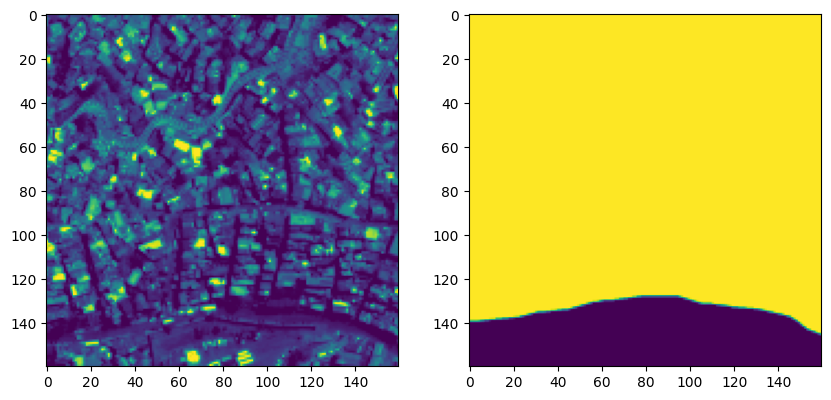

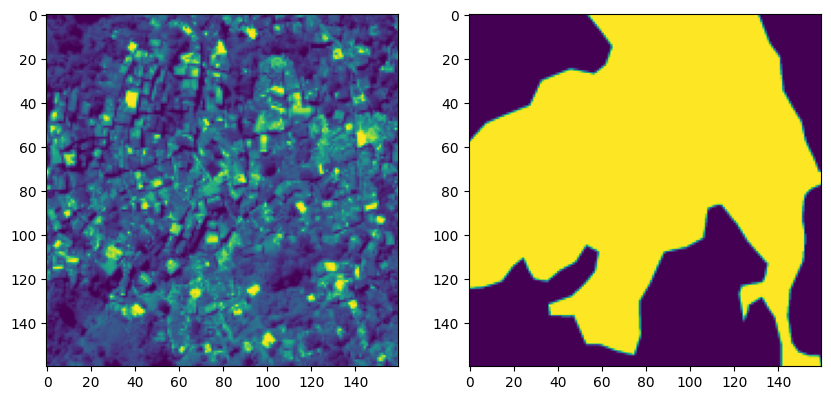

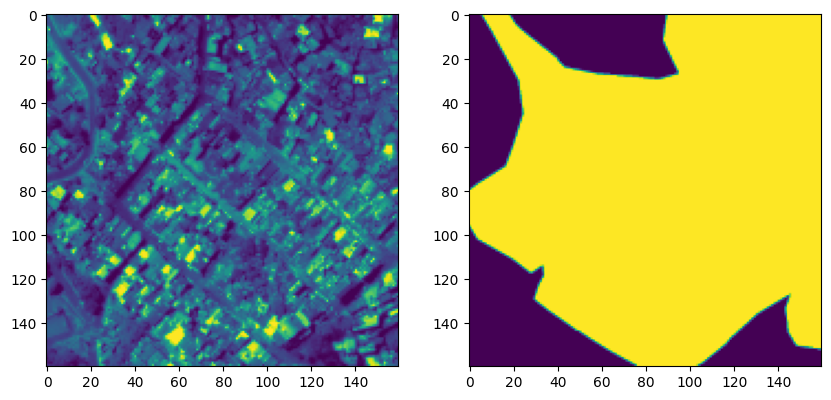

In [8]:
plot_data_generator(num_samples=3, fig_size=(10, 10), train_config=config, img_ch=3)

### Entrenamiento

Se entrena el modelo con los parametros establecidos

#### [English] Training 

The model is trained with the established parameters.

#### [Portugues] Treinamento

O modelo é treinado com os parâmetros estabelecidos.


In [9]:
res_config = train(config)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 160, 160, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

 batch_normalization_5 (BatchNo  (None, 20, 20, 512)  2048       ['concatenate_1[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv2d_14 (Conv2D)             (None, 20, 20, 256)  1179904     ['batch_normalization_5[0][0]']  
                                                                                                  
 conv2d_15 (Conv2D)             (None, 20, 20, 256)  590080      ['conv2d_14[0][0]']              
                                                                                                  
 dropout_5 (Dropout)            (None, 20, 20, 256)  0           ['conv2d_15[0][0]']              
                                                                                                  
 conv2d_transpose_2 (Conv2DTran  (None, 40, 40, 128)  131200     ['dropout_5[0][0]']              
 spose)   

100/100 [==============================] - ETA: 0s - loss: 0.1388 - mean_io_u: 0.2068
Epoch 9: val_loss improved from 0.25169 to 0.22364, saving model to /app/data/models/model_sample.h5
100/100 [==============================] - 34s 339ms/step - loss: 0.1388 - mean_io_u: 0.2068 - val_loss: 0.2236 - val_mean_io_u: 0.2373
Epoch 10/10
100/100 [==============================] - ETA: 0s - loss: 0.1459 - mean_io_u: 0.2119
Epoch 10: val_loss improved from 0.22364 to 0.13176, saving model to /app/data/models/model_sample.h5
3/3 [==============================] - 1s 292ms/step - loss: 0.1202 - mean_io_u: 0.1785
*** Final  metrics ***
Loss: 0.12022745609283447
Mean IoU: 0.17845052480697632


### Graficos Loss y Mean_iou de train-test

#### [English] Loss and Mean_iou graphs from train-test

#### [Portugues] Gráficos de Loss e Mean_iou do train-test

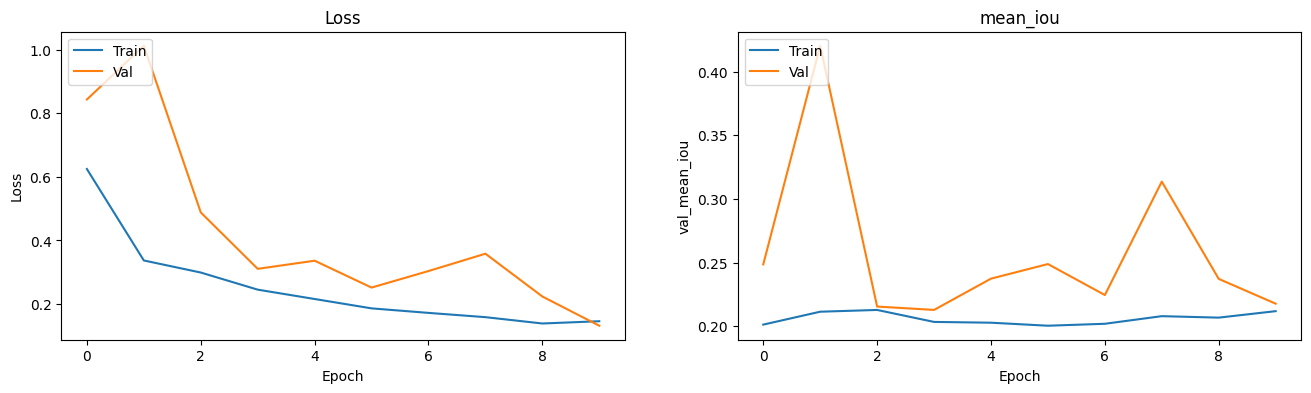

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

plt.subplot(121)
plt.plot(res_config.history['loss'])
plt.plot(res_config.history['val_loss'])
plt.title('Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(res_config.history['mean_io_u'])
plt.plot(res_config.history['val_mean_io_u'])
plt.title('mean_iou')
plt.ylabel('val_mean_iou')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()